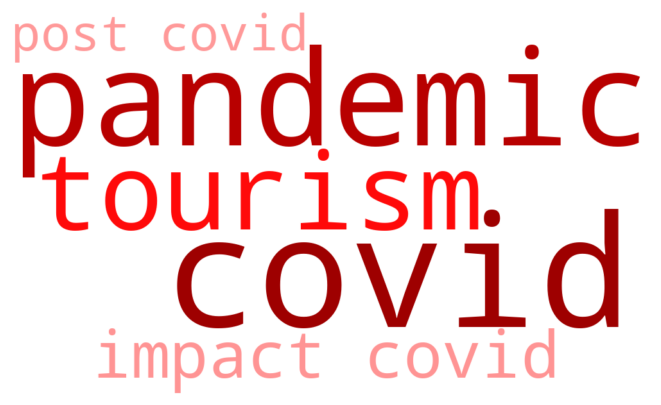

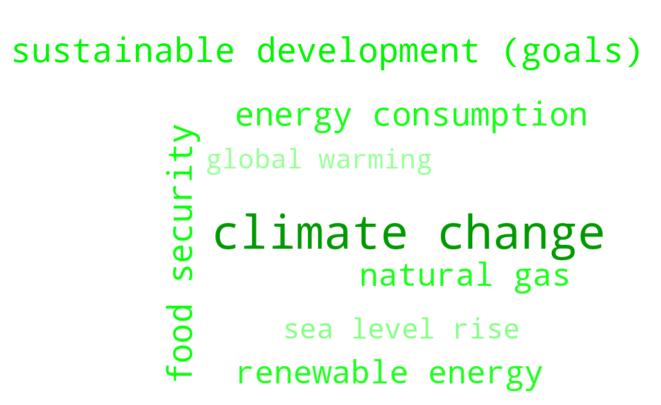

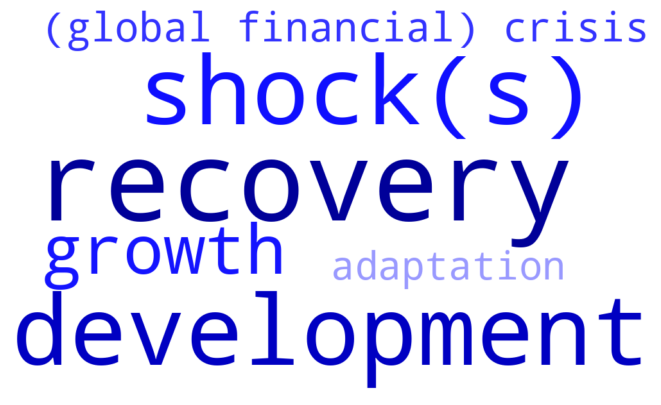

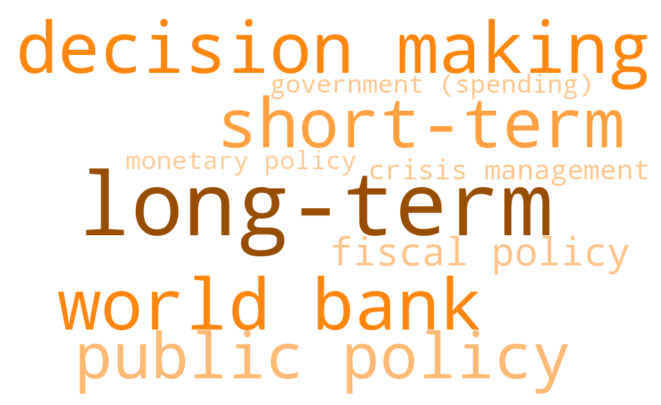

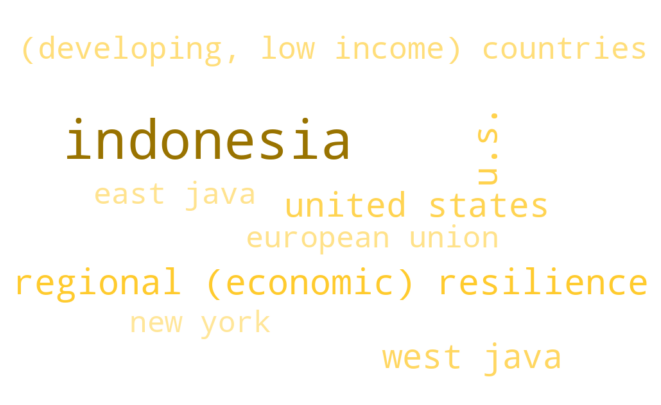

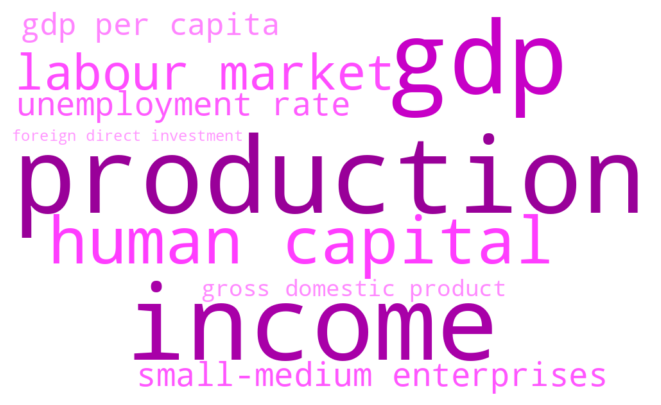

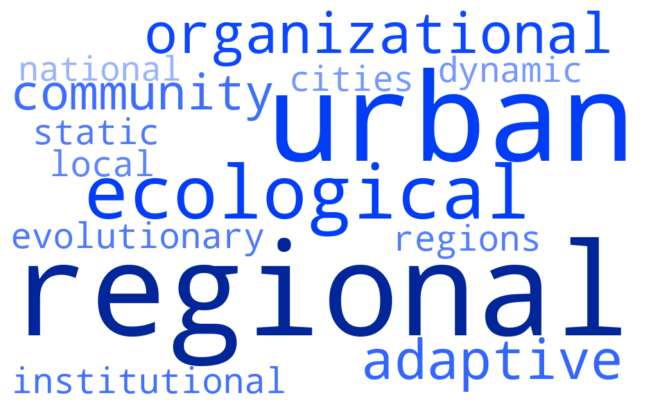

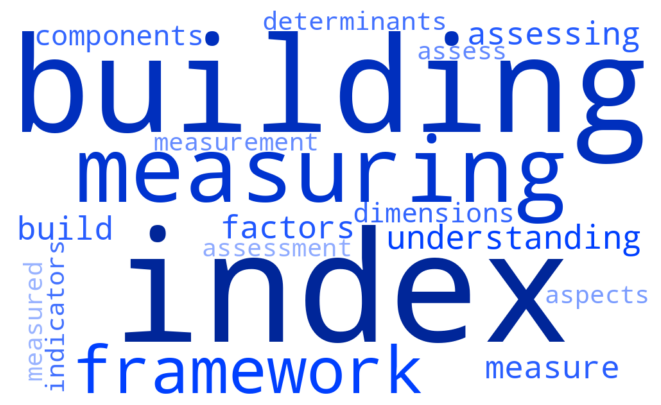

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

covid = {
    'covid': 4167,
    'pandemic': 3005,
    'post covid': 241,
    'impact covid': 261,
    'tourism': 1203
}

ecology = {
    'climate change':1030,
    'sustainable development (goals)':319,
    'food security':250,
    'energy consumption':224,
    'natural gas':201,
    'renewable energy':188,
    'sea level rise':52,
    'global warming':38
}

evolution = {
    'recovery':3636,
    '(global financial) crisis':2111,
    'growth':2368,
    'adaptation':1460,
    'shock(s)':2413,
    'development':3176
}

governance = {
    'fiscal policy':140,
    'monetary policy':128,
    'public policy':154,
    'crisis management':137,
    'government (spending)':137,
    'long-term':471,
    'decision making':263,
    'world bank':259,
    'short-term':200
}

geography = {
    'indonesia':1756,
    'regional (economic) resilience':423,
    '(developing, low income) countries':200,
    'u.s.':302,
    'united states':300,
    'east java':158,
    'west java':257,
    'european union':169,
    'new york':141
}

economic_variables = {
    'gdp':1082,
    'gross domestic product':73,
    'production':1893,
    'income':1634,
    'human capital':216,
    'small-medium enterprises':151,
    'gdp per capita':79,
    'foreign direct investment':59,
    'unemployment rate':145,
    'labour market':172
}

collocations_pattern_1_modifiers = {
    'regional':1522521,
    'urban':403109,
    'ecological':384901,
    'organizational':305266,
    'adaptive':173342,
    'community':143085,
    'institutional':139508,
    'static':114732,
    'evolutionary':113674,
    'local':92485,
    'dynamic':63456,
    'national':36458,
    'regions':104633,
    'cities':64685
}

collocations_pattern_2_measure = {
    'index':422562,
    'building':301261,
    'measuring':239197,
    'framework':145813,
    'understanding':142565,
    'factors':103388,
    'assessing':97633,
    'measure':94885,
    'build':92645,
    'components':85101,
    'dimensions':84272,
    'determinants':71051,
    'indicators':70153,
    'assess':51423,
    'measurement':47582,
    'aspects':40187,
    'assessment':31852,
    'measured':27407
}

themes = [covid, ecology, evolution, governance, geography, economic_variables, collocations_pattern_1_modifiers, collocations_pattern_2_measure]
hues = ['0', '120', '240', '30', '45', '300', '225', '225']

for theme, hue in zip(themes, hues):
    log_freq = {word: np.log1p(freq) for word, freq in theme.items()}

    min_log_freq = min(log_freq.values())
    max_log_freq = max(log_freq.values())

    def gradient_red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        # Map the frequency of the word to a lightness value (darker for more frequent words)
        frequency = log_freq[word]
        lightness = 80 - int(50 * (frequency - min_log_freq) / (max_log_freq - min_log_freq))  # Adjust lightness range
        return f"hsl({hue}, 100%, {lightness}%)"

    # Create a word cloud
    wordcloud = WordCloud(width=1000, height=600, background_color='white', color_func=gradient_red_color_func).generate_from_frequencies(log_freq)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
